the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60153.121717 from DATE-END'. [astropy.wcs.wcs]


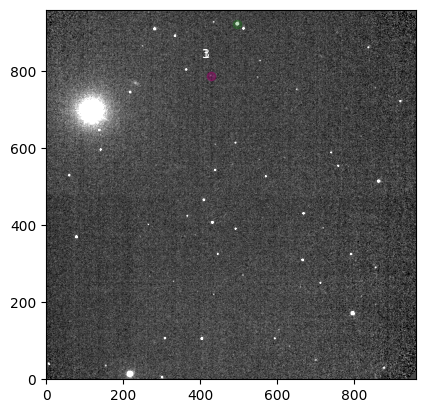

In [1]:
import os
import pandas as pd
from photometry import Photometry
from scripts.tools import sort_files
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from photometry import Photometry
from copy import copy

max_size = 10
star_name = "GRB 230728A"
_set = "first"
camera = 3
src_path = os.path.join(
    "..",
    "Pol charact MOPTOP",
    "Scientific objects",
    star_name,
    f"{_set} set",
    "combined",
)


csv_file = os.path.join(src_path, "..", "setup", f"objects coordinates.csv")
df = pd.read_csv(csv_file)
objects = {
    "name": df["name"],
    "ra": df[f"ra_cam{camera}"],
    "dec": df[f"dec_cam{camera}"],
}
file = os.path.join(src_path, "3_e_20230727_32_1_16_1.fits")
objects = pd.DataFrame.from_dict(objects)
phot = Photometry(file, objects, max_size)
phot.reset_object_coords()

obj = phot.obj_list[0]
size = 400
xcoord, ycoord = obj.xcoord, obj.ycoord
image = fits.getdata(
    file
)  # [ycoord - size : ycoord + size, xcoord - size : xcoord + size]
median = np.median(image)
std = np.median(np.abs(image - median))
plt.imshow(
    image, vmax=median + 8 * std, vmin=median - 3 * std, origin="lower", cmap="gray"
)


for idx, _object in enumerate(phot.obj_list):
    name, x, y = _object.name, _object.xcoord, _object.ycoord
    # x += size - xcoord
    # y += size - ycoord
    color = "b"
    if name == "circular":
        color = "r"
    if "comparison" in name:
        color = "g"
    if "eliminated" in name:
        color = "y"
    if "shifts" in name:
        continue
    plt.plot(x, y, f"{color}o", alpha=0.25)
    plt.annotate(
        f"{idx+1}", (x * 0.99, y * 1.05), ha="right", va="bottom", fontsize=9, color="w"
    )


figure = os.path.join(src_path, "..", "plots", f"field_map.png")
plt.savefig(figure)
plt.show()

# Create photometry.csv

In [261]:
objects_photometry = {}
for obj_name in objects["name"]:
    objects_photometry[obj_name] = {
        "mjd": [],
        "xcoord": [],
        "ycoord": [],
        "psf_radius": [],
        "star_photons": [],
        "star_error": [],
    }

objects = objects[objects.name != "circular"]
image_list = sort_files(src_path, f"{camera}_e")
for file in image_list:
    file_path = os.path.join(src_path, file)

    phot = Photometry(file_path, objects, max_size)
    phot.reset_object_coords()
    phot.calc_psf_radius()
    phot.calc_sky_photons()
    phot.calc_psf_photons()

    for _object in phot.obj_list:
        objects_photometry[_object.name]["mjd"].append(_object.mjd)
        objects_photometry[_object.name]["xcoord"].append(_object.xcoord)
        objects_photometry[_object.name]["ycoord"].append(_object.ycoord)
        objects_photometry[_object.name]["psf_radius"].append(_object.psf_radius)
        objects_photometry[_object.name]["star_photons"].append(_object.star_photons)
        objects_photometry[_object.name]["star_error"].append(_object.star_err)

for obj_name, obj_info in objects_photometry.items():
    df = pd.DataFrame.from_dict(obj_info)
    csv_file = os.path.join(src_path, "..", "photometry", f"{obj_name}_cam{camera}.csv")
    df.sort_values(by=["mjd"])
    df.to_csv(csv_file, index=False)

Set MJD-END to 60153.122643 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.123569 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.124495 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.125421 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.126347 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.127273 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.128199 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.129125 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.130051 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.130977 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.131903 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.132829 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.133755 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.134680 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.135606 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60153.136532 from DATE-END'. [astropy.wcs.wcs]
Set MJD-

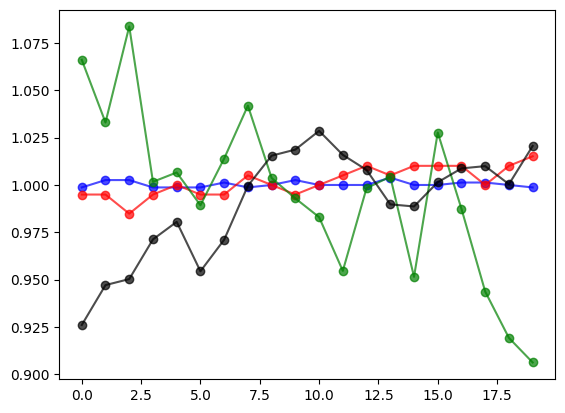

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

file = os.path.join(src_path, "..", "photometry", "comparison3_cam3.csv")
df = pd.read_csv(file)
x, y, radius, photons = df["xcoord"], df["ycoord"], df["psf_radius"], df["star_photons"]
x /= np.median(x)
y /= np.median(y)
radius /= np.median(radius)
photons /= np.median(photons)
plt.plot(x, "b-o", alpha=0.7)
plt.plot(y, "r-o", alpha=0.7)
plt.plot(radius, "g-o", alpha=0.7)
plt.plot(photons, "k-o", alpha=0.7)

plt.show()

# Looing at the comparison star

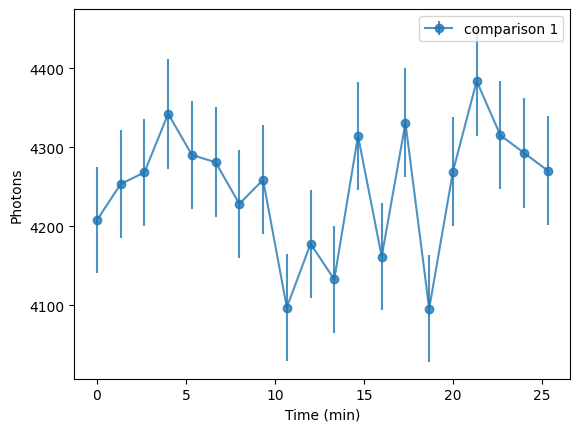

In [262]:
import pandas as pd
import matplotlib.pyplot as plt


def read_csv_files(file):
    df = pd.read_csv(csv_file)
    comp = df["star_photons"]
    comp_err = df["star_error"]

    mjd = df["mjd"]
    mjd = (mjd - mjd[0]) * 24 * 60

    return mjd, comp, comp_err


for idx in range(1):
    csv_file = os.path.join(src_path, "..", "photometry", f"comparison{idx+1}_cam3.csv")
    mjd, comp, comp_err = read_csv_files(csv_file)
    plt.errorbar(mjd, comp, comp_err, fmt="o-", alpha=0.8, label=f"comparison {idx+1}")
plt.legend()
plt.xlabel("Time (min)")
plt.ylabel("Photons")
plt.show()

# Creating the final comparison

# Plot light curve

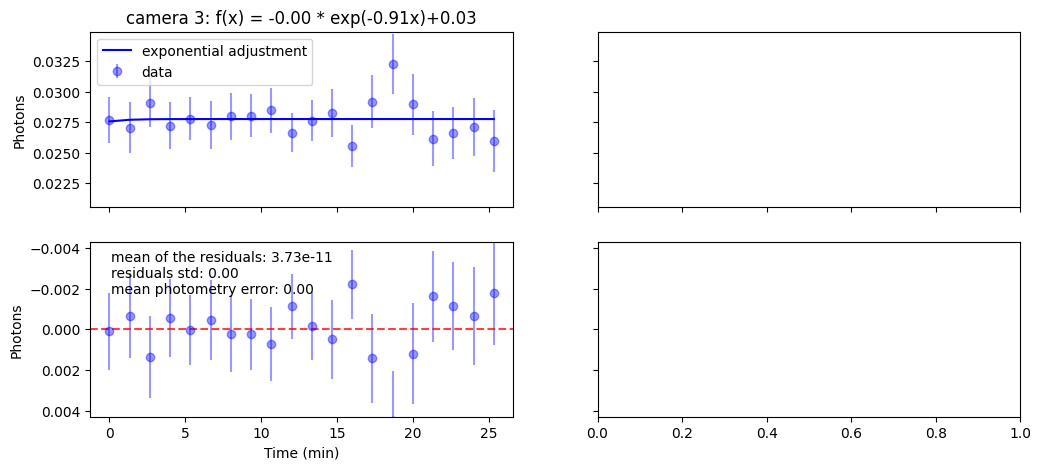

In [251]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy
from math import sqrt, log10
from astropy.time import Time


def monoExp(x, a, b, c):
    return a * np.exp(-b * x) + c


def calc_obj_magnitude(star_photons, star_err, comp_photons, comp_err, mag_comparison):
    star_photons, comp_photons = np.asarray(star_photons), np.asarray(comp_photons)

    tmp = star_photons / comp_photons
    tmp_err = np.abs(tmp) * np.sqrt(
        (star_err / star_photons) ** 2 + (comp_err / comp_photons) ** 2
    )
    star_mag = -2.5 * np.log10(tmp) + mag_comparison
    star_mag_err = 2.5 * tmp_err / (tmp * np.log2(10))
    return star_mag, star_mag_err


def calc_exponential_adjust(x, y):
    params, _ = scipy.optimize.curve_fit(monoExp, x, y)
    a, b, c = params
    exp_adjust = monoExp(x, a, b, c)
    return exp_adjust, a, b, c


def calc_linear_adjust(x, y):
    a, b = np.polyfit(x, y, 1)
    return a * x + b, a, b


def plot_light_curve(ax, mjd, cand, cand_err, exp_adjust, adjus_param, n_std=1):
    a, b, c = adjus_param
    mean = np.mean(cand)
    std = np.std(cand)
    ax.errorbar(
        mjd, cand, cand_err, marker="o", color="b", alpha=0.4, label="data", ls="none"
    )

    ax.plot(mjd, exp_adjust, "b-", label="exponential adjustment")
    ax.set_title(f"camera {camera}: f(x) = {a:.2f} * exp(-{b:.2f}x)+{c:.2f}")
    ax.legend()
    ax.set_ylim(mean - n_std * std, mean + n_std * std)
    ax.set_ylabel("Photons")
    # ax.invert_yaxis()


def plot_residuals(ax, cand, cand_err, exp_adjust, n_std=3):
    residuals = cand - exp_adjust
    mean = np.mean(residuals)
    std = np.std(residuals)

    ax.errorbar(
        mjd,
        residuals,
        cand_err,
        marker="o",
        color="b",
        alpha=0.4,
        label="data",
        ls="none",
    )
    ax.set_ylabel("Residuals")
    ax.axhline(mean, color="r", linestyle="--", alpha=0.75)
    ax.set_ylim(mean - n_std * std, mean + n_std * std)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Photons")
    ax.invert_yaxis()
    ax.annotate(
        f"mean of the residuals: {mean:.2e}\nresiduals std: {std:.2f}\nmean photometry error: {np.mean(cand_err):.2f}",
        (0.05, 0.95),
        fontsize=10,
        ha="left",
        va="top",
        xycoords="axes fraction",
    )


def plot_circular_data(mjd_start: float, ax):
    circulars = ["34487", "34483"]
    for idx, circular in enumerate(circulars):
        csv_path = os.path.join(src_path, "..", "Circulars", circular + ".csv")
        df = pd.read_csv(csv_path)
        utc = df["UT start"].values
        n = 4

        mjd = [Time(value, format="isot").to_value("mjd") for value in utc] - mjd_start
        mag = df["Rmag"]
        err = df["err"]

        ax.errorbar(
            mjd[:n],
            mag[:n],
            err[:n],
            marker="o",
            color=["r", "g"][idx],
            label="Circular " + circular,
            alpha=0.5,
            ls="none",
        )


def read_star_csv_files(candidate):
    csv_path = os.path.join(src_path, "..", "photometry")

    csv_file = os.path.join(csv_path, f"candidate{candidate}_cam{camera}.csv")
    df = pd.read_csv(csv_file)
    cand = df["star_photons"]
    cand_err = df["star_error"]

    mjd = df["mjd"]
    mjd = (mjd - mjd[0]) * 24 * 60

    return mjd, cand, cand_err


fig, axs = plt.subplots(2, 2, figsize=(12, 5), sharex="col", sharey="row")
for camera in [3]:
    mjd, star, star_err = read_star_csv_files(candidate=7)

    star /= comp
    star_err /= comp

    exp_adjust, *adjus_param = calc_exponential_adjust(mjd, star)

    ax = axs[0, camera - 3]
    plot_light_curve(ax, mjd, star, star_err, exp_adjust, adjus_param, 5)

    ax = axs[1, camera - 3]
    plot_residuals(ax, star, star_err, exp_adjust, 3)


plt.savefig(os.path.join(src_path, "..", "plots", "light_curve.png"))
plt.show()

# Plot object coordinates over the image

Text(0, 0.5, 'Residuals')

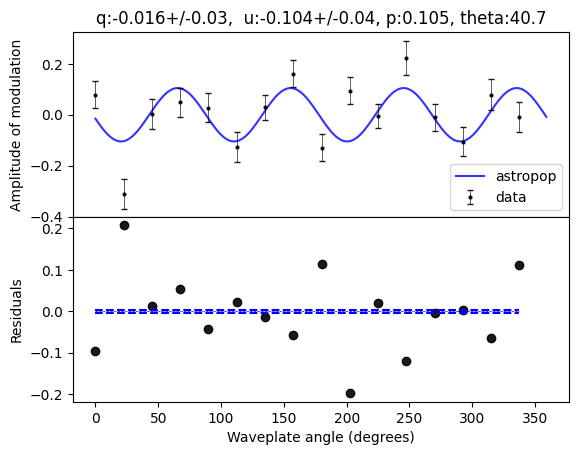

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy
from math import sqrt, log10, pi, atan
from astropy.time import Time
from astropop.polarimetry.dualbeam import SLSDualBeamPolarimetry, halfwave_model
from astropy import units


def read_csv_files(camera):
    cand = []
    csv_path = os.path.join(src_path, "..", "photometry")
    csv_file = os.path.join(csv_path, f"original_cam{camera}.csv")
    n = 16
    idx = 0
    df = pd.read_csv(csv_file)
    cand = df["star_photons"][:n]
    cand_err = df["star_error"][:n]

    mjd = df["mjd"][:n]
    mjd = (mjd - mjd[0]) * 24 * 60

    return mjd, cand, cand_err


def plot_light_curve(ax, mjd, cand, cand_err, n_std=1):
    mean = np.mean(cand)
    std = np.std(cand)
    ax.errorbar(
        mjd, cand, cand_err, marker="o", color="b", alpha=0.4, label="data", ls="none"
    )
    ax.legend()
    ax.set_ylim(mean - n_std * std, mean + n_std * std)
    ax.set_ylabel("Photons")


def plot_residuals(ax, cand, cand_err, exp_adjust, n_std=3):
    residuals = cand - exp_adjust
    mean = np.mean(residuals)
    std = np.std(residuals)

    ax.errorbar(
        mjd,
        residuals,
        cand_err,
        marker="o",
        color="b",
        alpha=0.4,
        label="data",
        ls="none",
    )
    ax.set_ylabel("Residuals")
    ax.axhline(mean, color="r", linestyle="--", alpha=0.75)
    ax.set_ylim(mean - n_std * std, mean + n_std * std)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Photons")
    ax.invert_yaxis()
    ax.annotate(
        f"mean of the residuals: {mean:.2e}\nresiduals std: {std:.2f}\nmean photometry error: {np.mean(cand_err):.2f}",
        (0.05, 0.95),
        fontsize=10,
        ha="left",
        va="top",
        xycoords="axes fraction",
    )


mjd, ord, ord_err = read_csv_files(3)
mjd, extra, extra_err = read_csv_files(4)
angles = np.linspace(0, 22.5 * 15, 16)
pol_frac = (ord - extra) / (ord + extra)

pol = SLSDualBeamPolarimetry("halfwave", compute_k=True, zero=0)
line = np.arange(0, 360, 1) * units.degree

resul = pol.compute(angles, ord, extra, ord_err, extra_err)
model = halfwave_model(line, resul.q.nominal, resul.u.nominal, resul.zero)
noise = halfwave_model(angles, resul.q.nominal, resul.u.nominal, zero=None)
sigma = noise - resul.zi.nominal

q, u = float(resul.q), float(resul.u)
q_err, u_err = resul.q.uncertainty, resul.u.uncertainty
p = sqrt(q**2 + u**2)
theta = np.rad2deg(atan(u / q)) / 2

fig = plt.figure()
fig.subplots_adjust(hspace=0)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)

ax1.set_title(
    f"q:{q:.3f}+/-{q_err:.2f},  u:{u:.3f}+/-{u_err:.2f}, p:{p:.3f}, theta:{theta:.1f}"
)
ax1.plot(line, model, "-b", alpha=0.8, label="astropop")
ax1.errorbar(
    angles,
    resul.zi.nominal,
    yerr=resul.zi.std_dev,
    fmt="ko",
    ms=2,
    capsize=2,
    lw=0.5,
    alpha=0.9,
    label="data",
)
ax1.set_ylabel("Amplitude of modulation")
ax1.legend()

ax2.plot(angles, sigma, "ko", alpha=0.9, label="noise")
ax2.hlines(0, angles[0], angles[-1], linestyles="--", color="b", lw=0.5)
ax2.hlines(-np.mean(sigma), angles[0], angles[-1], linestyles="--", color="b")
ax2.hlines(np.mean(sigma), angles[0], angles[-1], linestyles="--", color="b")
ax2.set_xlabel("Waveplate angle (degrees)")
ax2.set_ylabel("Residuals")